In [1]:
import torch
import torch.nn as nn 
import torch.optim as optim

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
community_size = 3

D_min = [0.0,0.0,0.0]
D_max = [10.0,10.0,10.0]

G_min = [0.0,0.0,0.0]
G_max = [10.0,0.0,0.0]

Kappa = [[0.0, 10.0, 10.0],
            [10.0, 0.0, 5.0],
            [10.0, 5.0, 0.0]]

Cost = [[0.0, 1.0, 1.0],
        [3.0, 0.0, 1.0],
        [2.0, 1.0, 0.0]]

#probabilities = [0.5, 0.5]

probabilities = [1]
connection_matrix = [[0,1,1],[1,0,1],[1,1,0]]

In [5]:
import random

A_tilde = [random.uniform(0,1) for i in range(community_size)]
B_tilde = [random.uniform(0,1) for i in range(community_size)]

a = [random.uniform(0,1) for i in range(community_size)]
b = [random.uniform(0,1) for i in range(community_size)]
d = [random.uniform(0,1) for i in range(community_size)]

d_target = [[random.uniform(0,8) for j in range(len(probabilities))] for i in range(community_size)]
g_res = [[random.uniform(0,3) for j in range(len(probabilities))] for i in range(community_size)]

g_res = np.array(g_res)
d_target = np.array(d_target)

risk_aversion = [random.uniform(0,1) for i in range(community_size)]

In [6]:
from supplement_package.game.torch_grad import TorchPlayer, BasicFunctions

agents = []

TorchPlayer.community_size = community_size

epsilon = 0.001
alpha = [[proba/(1 - risk_aversion[i]) for proba in probabilities] for i in range(community_size)]
#alpha = [[0.2 for proba in probabilities] for i in range(community_size)]
gamma = [proba/(1 - min(risk_aversion)) for proba in probabilities]

j_max = [10 for i in range(community_size)]

for i in range(community_size):
    agent = TorchPlayer(i, d_target[i], g_res[i], a[i], b[i], d[i], 
                A_tilde[i], B_tilde[i], D_min[i], D_max[i], 
                G_min[i], G_max[i], risk_aversion[i], Kappa[i], Cost[i], connection_matrix[i],
                probabilities = probabilities,
                alpha = alpha[i], 
                gamma = gamma, 
                insurance_bound=j_max[i])
    
    agents.append(agent)

In [7]:
agents[0].__dict__

{'probabilities': [1],
 'probabilities_ind': [0],
 'alpha': [6.270410247776456],
 'gamma': [1.1555003067733352],
 'j_max': 10,
 'plot_j': [[]],
 'plot_w': [[]],
 'id': 0,
 'D_target': array([1.39484972]),
 'G_res': array([1.70808061]),
 'a': 0.45698876878367545,
 'b': 0.0058185652028283075,
 'd': 0.8294007292319038,
 'a_tilde': 0.11032372604300178,
 'b_tilde': 0.11621546794340432,
 'D_min': 0.0,
 'D_max': 10.0,
 'G_min': 0.0,
 'G_max': 10.0,
 'risk_aversion': 0.8405208015927492,
 'q_others': {0: [[0], [0], [0]], 1: [[0], [0], [0]], 2: [[0], [0], [0]]},
 'w_others': {},
 'trading_cost': [0.0, 1.0, 1.0],
 'connections': [0, 1, 1],
 'kappa': array([ 0., 10., 10.]),
 'G': tensor([0.], requires_grad=True),
 'D': tensor([0.], requires_grad=True),
 'q': tensor([[0.],
         [0.],
         [0.]], requires_grad=True),
 'plot_d': [[]],
 'plot_g': [[]],
 'plot_u': [[]],
 'plot_eta': [],
 'plot_q': [[[]], [[]], [[]]]}

In [8]:
import gurobipy as gp
from supplement_package.gurobi_implementation.gurobi import Gurobi
from supplement_package.gurobi_implementation.gurobi import GurobiSolution

In [9]:
model_1 = gp.Model()
setup = GurobiSolution(agents=agents,
                model = model_1,
                solution_type='initial')

setup.build_model()

model_1.display()

Set parameter Username
Academic license - for non-commercial use only - expires 2022-04-02
Minimize
<gurobi.QuadExpr: 110.53438359084994 + -0.3077700359753138 D_0_0
+ 0.0058185652028283075 G_0_0 + q_0_1_0 + q_0_2_0 + -14.929125135027617 D_1_0
+ 0.5743323478921354 G_1_0 + 3.0 q_1_0_0 + q_1_2_0 + -13.197025617919559 D_2_0
+ 0.22075892024612043 G_2_0 + 2.0 q_2_0_0 + q_2_1_0 + [ 0.11032372604300178 D_0_0 ^ 2
+ 0.22849438439183772 G_0_0 ^ 2 + 0.9582980713342019 D_1_0 ^ 2
+ 0.029190636675781367 G_1_0 ^ 2 + 0.8573585362241909 D_2_0 ^ 2
+ 0.1566941138599166 G_2_0 ^ 2 ]>
Subject To
  Bilateral trading for pair (0, 1) proba 0: <gurobi.LinExpr: q_0_1_0 + q_1_0_0> = 0
  Bilateral trading for pair (0, 2) proba 0: <gurobi.LinExpr: q_0_2_0 + q_2_0_0> = 0
SD balance for agent 0 proba 0: <gurobi.LinExpr: D_0_0 + -1.0 G_0_0 + -1.0 q_0_1_0 +
 -1.0 q_0_2_0> = 1.70808
  Bilateral trading for pair (1, 0) proba 0: <gurobi.LinExpr: q_0_1_0 + q_1_0_0> = 0
  Bilateral trading for pair (1, 2) proba 0: <gurobi.Li

In [10]:
model_1.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 9 rows, 12 columns and 24 nonzeros
Model fingerprint: 0x9a1b95b2
Model has 6 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e-03, 1e+01]
  QObjective range [6e-02, 2e+00]
  Bounds range     [5e+00, 1e+01]
  RHS range        [4e-01, 3e+00]
Presolve removed 6 rows and 5 columns
Presolve time: 0.00s
Presolved: 3 rows, 7 columns, 10 nonzeros
Presolved model has 4 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.12682466e+06 -1.21518278e+06  2.50e+03 8.78e+02  1.01e+06     0s
   1   3.64441858e+01 -7.86777

In [11]:
lr = 1e-4
rho = 700

vars = []
with torch.no_grad():
    for agent in agents:
        vars += [agent.G, agent.D, agent.q]

#torch.autograd.set_detect_anomaly(True)
    
optimizer = optim.SGD(vars, lr = lr, momentum=0.9, nesterov=True)

for i in range(10000):
    for agent in agents:
        
        utility = BasicFunctions.utility(agent) 
        penalty_SD_balance = BasicFunctions.penalty_SD_balance(agent)
        penalty_demand_bounds_lower = BasicFunctions.penalty_demand_bounds_lower(agent)
        penalty_demand_bounds_upper = BasicFunctions.penalty_demand_bounds_upper(agent)
        penalty_generation_bounds_lower = BasicFunctions.penalty_generation_bounds_lower(agent)
        penalty_generation_bounds_upper = BasicFunctions.penalty_generation_bounds_upper(agent)
        penalty_trading_bound_lower = BasicFunctions.penalty_trading_bound_lower(agent)
        penalty_trading_bound_upper = BasicFunctions.penalty_trading_bound_upper(agent)
        penalty_bilateral_trading_bounds = BasicFunctions.penalty_bilateral_trading_bounds(agent)

        loss = 0

        for proba in agent.probabilities_ind:
            loss += (utility[proba]
                + rho * penalty_SD_balance[proba]
                + rho * penalty_demand_bounds_lower[proba]
                + rho * penalty_demand_bounds_upper[proba]
                + rho * penalty_generation_bounds_lower[proba]
                + rho * penalty_generation_bounds_upper[proba])

            for agent_2, connection in enumerate(agent.connections):
                if connection:
                    loss += (rho * penalty_trading_bound_lower[agent_2][proba]
                            + rho * penalty_trading_bound_upper[agent_2][proba]
                            + rho * penalty_bilateral_trading_bounds[agent_2][proba])

        loss.backward()

        optimizer.step()

        for proba in agent.probabilities_ind:
            with torch.no_grad():
                agent.plot_d[proba].append(agent.D.data.numpy()[proba])
                agent.plot_g[proba].append(agent.G.data.numpy()[proba])
                
                for agent_2 in agents:
                    agent.plot_q[agent_2.id][proba].append(agent.q.data.numpy()[agent_2.id][proba])

        optimizer.zero_grad()

    for agent in agents:      
        for agent_2 in agents:
            #for proba in agent.probabilities_ind:
            agent_2.q_others[agent.id] = agent.q.data.numpy().tolist()

In [12]:
total_cost = 0
with torch.no_grad():
    for agent in agents:
        total_cost += sum(BasicFunctions.utility(agent))

total_cost


tensor(29.8691, dtype=torch.float64)

In [13]:
model_1.ObjVal

26.7348918562721

In [14]:
model_1.getVars()

[<gurobi.Var D_0_0 (value 3.4987237012695337e-11)>,
 <gurobi.Var G_0_0 (value 5.863904023086756)>,
 <gurobi.Var q_0_1_0 (value 0.021974006648219913)>,
 <gurobi.Var q_0_2_0 (value -7.593958640724189)>,
 <gurobi.Var D_1_0 (value 5.344667069915031)>,
 <gurobi.Var G_1_0 (value 0.0)>,
 <gurobi.Var q_1_0_0 (value -0.021974006648219913)>,
 <gurobi.Var q_1_2_0 (value 4.999999999978893)>,
 <gurobi.Var D_2_0 (value 5.5469610268130465)>,
 <gurobi.Var G_2_0 (value 0.0)>,
 <gurobi.Var q_2_0_0 (value 7.593958640724189)>,
 <gurobi.Var q_2_1_0 (value -4.999999999978893)>]

In [15]:
optimizer.param_groups

[{'params': [tensor([5.7694], requires_grad=True),
   tensor([-0.0017], requires_grad=True),
   tensor([[ 0.0000],
           [-3.2496],
           [-4.2315]], requires_grad=True),
   tensor([0.0027], requires_grad=True),
   tensor([5.4827], requires_grad=True),
   tensor([[3.2507],
           [0.0000],
           [1.8594]], requires_grad=True),
   tensor([0.0027], requires_grad=True),
   tensor([5.3343], requires_grad=True),
   tensor([[ 4.2328],
           [-1.8571],
           [ 0.0000]], requires_grad=True)],
  'lr': 0.0001,
  'momentum': 0.9,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': True}]

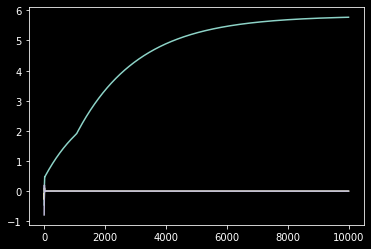

In [16]:
for agent in agents:
    for proba in agent.probabilities_ind:
        plt.plot(agent.plot_g[proba])

In [17]:
A_tilde = [1, 2, 3]
B_tilde = [4, 5, 6]

a = [1, 1, 1]
b = [-3, -4, -1]
d = [2, 4, 1]

d_target = [[1 for i in range(len(probabilities))], [2 for i in range(len(probabilities))], [3 for i in range(len(probabilities))]]
g_res = [[2 for i in range(len(probabilities))], [3 for i in range(len(probabilities))], [4 for i in range(len(probabilities))]]

g_res = np.array(g_res)
d_target = np.array(d_target)

risk_aversion = [random.uniform(0,1) for i in range(community_size)]

In [18]:
D_min = [0.0,0.0,0.0]
D_max = [10.0,10.0,10.0]

G_min = [0.0,0.0,0.0]
G_max = [10.0, 10.0, 10.0]

Kappa = [[0.0, 10.0, 10.0],
            [10.0, 0.0, 5.0],
            [10.0, 5.0, 0.0]]

Cost = [[0.0, -2.0, -1.0],
        [3.0, 0.0, 1.0],
        [-2.0, 1.0, 0.0]]

#probabilities = [0.5, 0.5]

probabilities = [1]
connection_matrix = [[0,1,1],[1,0,1],[1,1,0]]

In [19]:
agents = []

TorchPlayer.community_size = community_size

epsilon = 0.001
alpha = [[proba/(1 - risk_aversion[i]) for proba in probabilities] for i in range(community_size)]
#alpha = [[0.2 for proba in probabilities] for i in range(community_size)]
gamma = [proba/(1 - min(risk_aversion)) for proba in probabilities]

j_max = [10 for i in range(community_size)]

for i in range(community_size):
    agent = TorchPlayer(i, d_target[i], g_res[i], a[i], b[i], d[i], 
                A_tilde[i], B_tilde[i], D_min[i], D_max[i], 
                G_min[i], G_max[i], risk_aversion[i], Kappa[i], Cost[i], connection_matrix[i],
                probabilities = probabilities,
                alpha = alpha[i], 
                gamma = gamma, 
                insurance_bound=j_max[i])
    
    agents.append(agent)

In [20]:
model_2 = gp.Model()
setup = GurobiSolution(agents=agents,
                model = model_2,
                solution_type='test')

setup.build_model()

model_2.display()

Minimize
<gurobi.QuadExpr: 28.0 + -3.0 G_0_0 + -2.0 D_0_0 + -2.0 q_0_1_0 + -1.0 q_0_2_0 +
-4.0 G_1_0 + -8.0 D_1_0 + 3.0 q_1_0_0 + q_1_2_0 + -1.0 G_2_0 + -18.0 D_2_0 +
-2.0 q_2_0_0 + q_2_1_0 + [ 0.5 G_0_0 ^ 2 + D_0_0 ^ 2 + 0.5 G_1_0 ^ 2 + 2.0 D_1_0 ^ 2
+ 0.5 G_2_0 ^ 2 + 3.0 D_2_0 ^ 2 ]>
Subject To
SD balance for agent 0 proba 0: <gurobi.LinExpr: -1.0 G_0_0 + D_0_0 + -1.0 q_0_1_0 +
 -1.0 q_0_2_0> = 2
SD balance for agent 1 proba 0: <gurobi.LinExpr: -1.0 G_1_0 + D_1_0 + -1.0 q_1_0_0 +
 -1.0 q_1_2_0> = 3
SD balance for agent 2 proba 0: <gurobi.LinExpr: -1.0 G_2_0 + D_2_0 + -1.0 q_2_0_0 +
 -1.0 q_2_1_0> = 4
Bounds
  0 <= G_0_0 <= 10
  0 <= D_0_0 <= 10
  -10 <= q_0_1_0 <= 10
  -10 <= q_0_2_0 <= 10
  0 <= G_1_0 <= 10
  0 <= D_1_0 <= 10
  -10 <= q_1_0_0 <= 10
  -5 <= q_1_2_0 <= 5
  0 <= G_2_0 <= 10
  0 <= D_2_0 <= 10
  -10 <= q_2_0_0 <= 10
  -5 <= q_2_1_0 <= 5


In [21]:
model_2.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 3 rows, 12 columns and 12 nonzeros
Model fingerprint: 0x583224ae
Model has 6 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 2e+01]
  QObjective range [1e+00, 6e+00]
  Bounds range     [5e+00, 1e+01]
  RHS range        [2e+00, 4e+00]
Presolve time: 0.00s
Presolved: 3 rows, 12 columns, 12 nonzeros
Presolved model has 6 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 3.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.45680975e+06 -2.63375807e+06  2.38e+03 1.00e+03  1.01e+06     0s
   1   3.71514371e+01 -1.56648805e+05  2.38e-03 1.00e-03  6.53e+03 

In [22]:
model_2.getVars()

[<gurobi.Var G_0_0 (value 1.0000000018725705)>,
 <gurobi.Var D_0_0 (value 1.9999999994916602)>,
 <gurobi.Var q_0_1_0 (value 8.999999997614083)>,
 <gurobi.Var q_0_2_0 (value -9.999999999994994)>,
 <gurobi.Var G_1_0 (value 5.0000000000467795)>,
 <gurobi.Var D_1_0 (value 1.749999999990416)>,
 <gurobi.Var q_1_0_0 (value -9.999999999994717)>,
 <gurobi.Var q_1_2_0 (value 3.7499999999383533)>,
 <gurobi.Var G_2_0 (value 3.496314516161676e-10)>,
 <gurobi.Var D_2_0 (value 3.3333333333330293)>,
 <gurobi.Var q_2_0_0 (value 4.333333332979025)>,
 <gurobi.Var q_2_1_0 (value -4.9999999999956275)>]

In [23]:
lr = 1e-4
rho = 1000

vars = []
with torch.no_grad():
    for agent in agents:
        vars += [agent.G, agent.D, agent.q]

#torch.autograd.set_detect_anomaly(True)
    
optimizer = optim.Adam(vars, lr = lr)

for i in range(100000):
    for agent in agents:
        
        utility = BasicFunctions.utility(agent)
        penalty_SD_balance = BasicFunctions.penalty_SD_balance(agent)
        penalty_demand_bounds_lower = BasicFunctions.penalty_demand_bounds_lower(agent)
        penalty_demand_bounds_upper = BasicFunctions.penalty_demand_bounds_upper(agent)
        penalty_generation_bounds_lower = BasicFunctions.penalty_generation_bounds_lower(agent)
        penalty_generation_bounds_upper = BasicFunctions.penalty_generation_bounds_upper(agent)
        penalty_trading_bounds_lower = BasicFunctions.penalty_trading_bound_lower(agent)
        penalty_trading_bounds_upper = BasicFunctions.penalty_trading_bound_upper(agent)

        loss = 0

        for proba in agent.probabilities_ind:
            loss += (utility[proba]
                + rho * penalty_SD_balance[proba]
                + rho * penalty_demand_bounds_lower[proba]
                + rho * penalty_demand_bounds_upper[proba]
                + rho * penalty_generation_bounds_lower[proba]
                + rho * penalty_generation_bounds_upper[proba])

            #print(f'Loss before adding penalty for proba {proba} equals {loss}')

            
            for agent_2, connection in enumerate(agent.connections):
                if connection:
                    loss += (rho * penalty_trading_bounds_lower[agent_2][proba]
                            + rho * penalty_trading_bounds_upper[agent_2][proba])

                    #print(f'Loss after penalty for agent {agent_2} and proba {proba} equals {loss}')

        #print(f'Total loss equals {loss}')
        
        loss.backward()

        optimizer.step()

        for proba in agent.probabilities_ind:
            with torch.no_grad():
                agent.plot_d[proba].append(agent.D.data.numpy()[proba])
                
        optimizer.zero_grad()

In [24]:
total_cost = 0
with torch.no_grad():
    for agent in agents:
        total_cost += sum(BasicFunctions.utility(agent))

total_cost

tensor(-64.4703, dtype=torch.float64)

In [25]:
optimizer.param_groups

[{'params': [tensor([1.0002], requires_grad=True),
   tensor([1.9999], requires_grad=True),
   tensor([[  0.0000],
           [  9.0012],
           [-10.0005]], requires_grad=True),
   tensor([5.0000], requires_grad=True),
   tensor([1.7500], requires_grad=True),
   tensor([[-10.0010],
           [  0.0000],
           [  3.7505]], requires_grad=True),
   tensor([-0.0005], requires_grad=True),
   tensor([3.3333], requires_grad=True),
   tensor([[ 4.3363],
           [-5.0015],
           [ 0.0000]], requires_grad=True)],
  'lr': 0.0001,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False}]

In [26]:
model_2.getVars()

[<gurobi.Var G_0_0 (value 1.0000000018725705)>,
 <gurobi.Var D_0_0 (value 1.9999999994916602)>,
 <gurobi.Var q_0_1_0 (value 8.999999997614083)>,
 <gurobi.Var q_0_2_0 (value -9.999999999994994)>,
 <gurobi.Var G_1_0 (value 5.0000000000467795)>,
 <gurobi.Var D_1_0 (value 1.749999999990416)>,
 <gurobi.Var q_1_0_0 (value -9.999999999994717)>,
 <gurobi.Var q_1_2_0 (value 3.7499999999383533)>,
 <gurobi.Var G_2_0 (value 3.496314516161676e-10)>,
 <gurobi.Var D_2_0 (value 3.3333333333330293)>,
 <gurobi.Var q_2_0_0 (value 4.333333332979025)>,
 <gurobi.Var q_2_1_0 (value -4.9999999999956275)>]